# Boston House Pricing 

In the following notebook, we'll introduce the 'Boston House Pricing'.  
We'll perform an EDA, run a _Linear Regressin_ model and assess it.

## 0. Imports and data loading 

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

from sklearn.datasets import load_boston

In [3]:
dataset = load_boston()

The _dataset_ variable's type is _sklearn.utils.bunch_.  
All the sklearn datasets contains the following fields:  
* **_data_** : Raw values table
* **_target_** : Gold's values (here is the price)
* **_feature_names_** : Literally
* **_DESCR_** : Description about the data, what each feature means etc.
* **_filename_** : Absolute path to the corresponding CSV file

Let's print out the description:

In [13]:
print('\n'.join(dataset.DESCR.splitlines()))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Just by reading the desc., we can assume with features are more relevant to predict our target:  
Probably RM, CRIM and LSTAT more correlated to the house' price.  
Let's find some other correlations:

In [24]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1. EDA

In this section, we'd like to visualize the data:

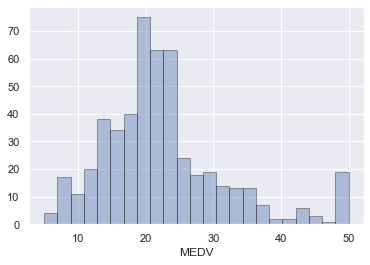

In [132]:
sns.distplot(df['MEDV'], kde=False, hist_kws=dict(ec="k"))

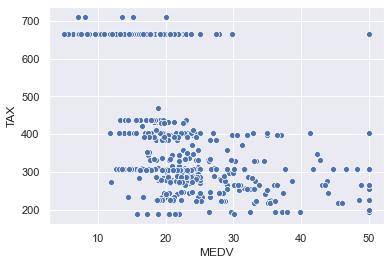

In [133]:
sns.scatterplot(x='MEDV', y='TAX', data=df)

In [135]:
df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

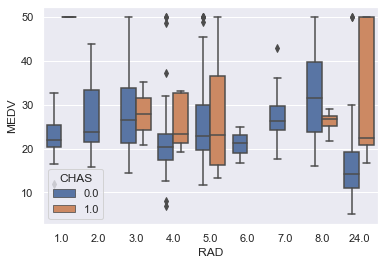

In [137]:
sns.boxplot(y='MEDV', x='RAD', hue='CHAS', data=df)

## 2. Features Selection 

For first glace, I'll plot a heatmap of the correlation matrix of the dataframe,  
to get a sense about the correlations:

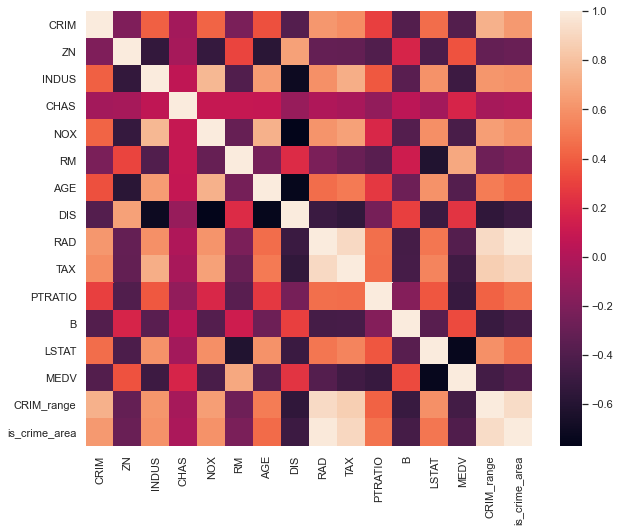

In [108]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

And let's see more clearly the correlation to the 'MEDV' column: 
(Note that we want to consider also the large-negative values, so I'll print the absolute values)

In [41]:
df.corr()['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

It's seems that people more care about the schools level and employments options more than the crime level.  
    
In the heatmap we can see that some features are correlated to each other. we might find those features and remov them.

### 1.2 Find correlations between features 

#### 1.2.1 Correlations to RAD

The RAD feature is an index value. We don't realy know its meaning, so let's search for correlations with other features:

In [47]:
df.corr()['RAD'].abs().sort_values(ascending=False)

RAD        1.000000
TAX        0.910228
CRIM       0.625505
NOX        0.611441
INDUS      0.595129
DIS        0.494588
LSTAT      0.488676
PTRATIO    0.464741
AGE        0.456022
B          0.444413
MEDV       0.381626
ZN         0.311948
RM         0.209847
CHAS       0.007368
Name: RAD, dtype: float64

Let's look at the most correlated features:

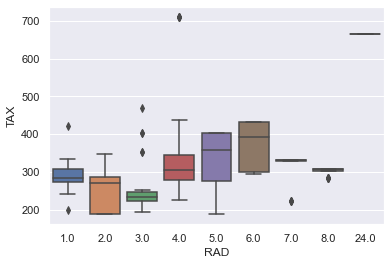

In [109]:
sns.boxplot(x='RAD', y='TAX', data=df)

In [138]:
df[['RAD', 'TAX']].corr()

,RAD,TAX
RAD,1.000000,0.910228
TAX,0.910228,1.000000


There's high correlation between RAD and TAX, so we may drop the TAX feature

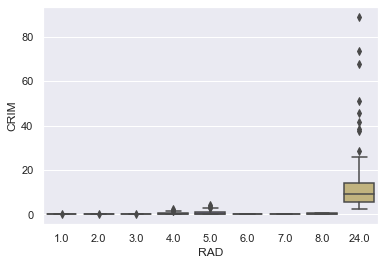

In [110]:
sns.boxplot(x='RAD', y='CRIM', data=df)

In [139]:
df[['RAD', 'CRIM']].corr()

,RAD,CRIM
RAD,1.000000,0.625505
CRIM,0.625505,1.000000


The CRIM column hold realy small value, so we may convert the values by ranges:

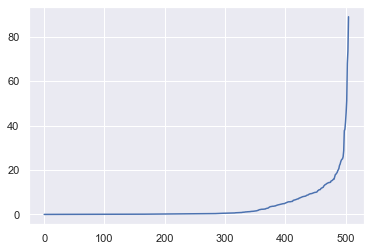

In [71]:
sns.lineplot(data=df['CRIM'].sort_values().reset_index()['CRIM'])

More than 70% of the column is under ~2

In [61]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [89]:
ranges= np.concatenate((np.linspace(0, 2, num=10, endpoint=False), np.linspace(2,10, num=9, endpoint=True)))

In [90]:
df['CRIM_range'] = df['CRIM'].apply(lambda x: find_nearest(ranges, x))

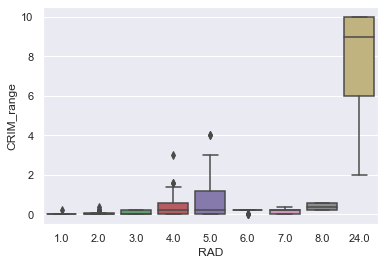

In [91]:
sns.boxplot(x='RAD', y='CRIM_range', data=df)

Now it's much more clearly that as long as the RAD index increases, the CRIM increases.  
In addition, we can see that RAD 24 realy unusual, with very high crime rates.  
Hence, we can unit both features, CRIM and RAD to one feature: is_crime_area.  
This new feature will be a binary, according to the rad index: rad == 24

In [100]:
df['is_crime_area'] = df['RAD'].apply(lambda rad: int(rad == 24))

With this change, we can ease our future model, by make it learn one binary feature, instead two continuous featues.

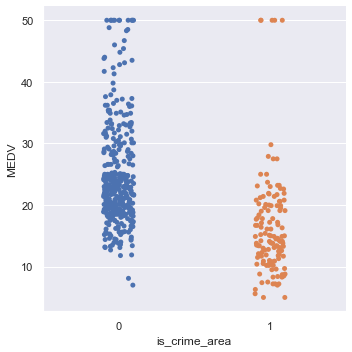

In [111]:
sns.catplot(x='is_crime_area', y='MEDV', data=df)

#### 1.2.2 Correlation to DIS

In [114]:
df.corr()['DIS'].sort_values(ascending=False)

DIS              1.000000
ZN               0.664408
B                0.291512
MEDV             0.249929
RM               0.205246
CHAS            -0.099176
PTRATIO         -0.232471
CRIM            -0.379670
is_crime_area   -0.489642
RAD             -0.494588
LSTAT           -0.496996
TAX             -0.534432
CRIM_range      -0.543106
INDUS           -0.708027
AGE             -0.747881
NOX             -0.769230
Name: DIS, dtype: float64

As described, the DIS feature is a weighted distance between 5 employments centers.  
We saw that there's a strong correlation between DIS and INDUS, so we may unit those features.  
Note that DIS and INDUS are negatively correlated, because as long the distance from employment centers
increases, the number of job opportunities (quantified by non-retail areas) decreases.

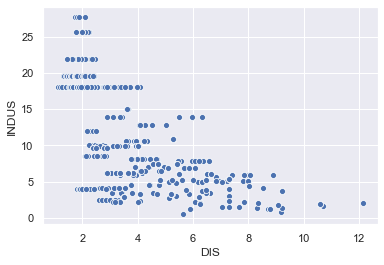

In [119]:
sns.scatterplot('DIS','INDUS',data=df)

And the same with the NOX:

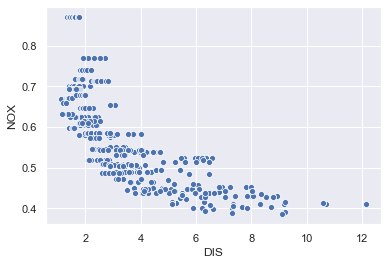

In [141]:
sns.scatterplot('DIS','NOX',data=df)

So we may drop the NOX and INDUS fetures

In [187]:
selected_features_corr = df.drop(['NOX', 'INDUS', 'RAD', 'CRIM', 'MEDV'], axis=1)

### 1.3 Find correlation by IVF 

After the correlations review, I'd like to compare my conclusions with the VIF method.

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def select_features(df, threshold):
    output = df.copy()
    k = df.shape[1]
    vif = [variance_inflation_factor(df.values, i) for i in range(k)]
    for i in range(1,k):
        print('iteration no. ', i)
        print(vif)
        idx = np.argmax(vif)
        print('Max vif feature is: ', df.columns[idx])
        if vif[idx] < threshold:
            break
            
        output = output.drop(output.columns[idx], axis=1)
        vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return output

In [184]:
selected_features_vif = select_features(df.drop(['is_crime_area', 'MEDV'], axis=1), 5)

iteration no.  1
[2.6575870258150585, 2.892486391819596, 14.486277244892833, 1.1588106973814636, 74.18267016659276, 77.95181724689064, 21.392115683782542, 14.930237265214416, 26.51586766398678, 61.229387811045946, 85.41842197274848, 20.825872245034446, 11.726991995902747, 15.985801018224016]
Max vif feature is:  PTRATIO
iteration no.  2
[2.65080528211555, 2.52023128718326, 14.275350903109507, 1.1469777836509178, 74.18259950152134, 60.714688504883135, 21.365028631386917, 12.56419583100569, 26.413711771337415, 59.321002796322595, 19.478734434253305, 10.66034467355762, 15.913024293645467]
Max vif feature is:  NOX
iteration no.  3
[2.6429302113667212, 2.5165642837024964, 13.154259287289438, 1.142545743013196, 41.41117192922282, 19.908424394473993, 12.406587174462818, 26.338919238599434, 57.72404628760046, 19.203445577179473, 9.818195701848587, 15.851153034069908]
Max vif feature is:  RAD
iteration no.  4
[2.6429239301539615, 2.4409933851805112, 9.291860246597647, 1.1227365951550556, 39.075

In [185]:
selected_features_vif

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
0,0.00632,18.0,0.0,4.0900,1.0,4.98
1,0.02731,0.0,0.0,4.9671,2.0,9.14
2,0.02729,0.0,0.0,4.9671,2.0,4.03
3,0.03237,0.0,0.0,6.0622,3.0,2.94
4,0.06905,0.0,0.0,6.0622,3.0,5.33
...,...,...,...,...,...,...
501,0.06263,0.0,0.0,2.4786,1.0,9.67
502,0.04527,0.0,0.0,2.2875,1.0,9.08
503,0.06076,0.0,0.0,2.1675,1.0,5.64
504,0.10959,0.0,0.0,2.3889,1.0,6.48


It's seem like the results are pretty much the same, but the manual approach gave more light dataframe.

In [160]:
selected_features['is_crime_area'] = df['is_crime_area']
selected_features.drop(['CRIM', 'RAD'], axis=1, inplace=True)

## 3. Linear Regression 

In this section, we'll run a linear regression to estimate the MEDV column.

### 3.1 Model on the entire data

In [323]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['MEDV', 'CRIM_range', 'is_crime_area'], axis=1), 
                                                    df['MEDV'], test_size=0.2, shuffle=True)

lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.736628845607796

Ok, the score it's no so good. let's check the weights:

In [289]:
dict(zip(df.drop('MEDV', axis=1).columns, lr.coef_))

{'CRIM': -0.09766824156780783,
 'ZN': 0.04449611524735884,
 'INDUS': 0.023510084491235587,
 'CHAS': 2.2943522819239393,
 'NOX': -18.826139662091073,
 'RM': 3.3135853673128373,
 'AGE': 0.010052050263981947,
 'DIS': -1.4309962302672028,
 'RAD': 0.41161981469478,
 'TAX': -0.011732459431644547,
 'PTRATIO': -1.0571902033405483,
 'B': 0.008734526810418287,
 'LSTAT': -0.5299200974183162,
 'CRIM_range': -0.10175506487237324,
 'is_crime_area': -1.8457321987981528}

Of course, this result is statistic, and if we re-run the model, we'll get different scores:

In [324]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['MEDV', 'CRIM_range', 'is_crime_area'], axis=1), 
                                                    df['MEDV'], test_size=0.2, shuffle=True)

lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.6638293906212849

To get more consist results, we should use Cross-Validation:

In [325]:
from sklearn.model_selection import cross_val_score

X = df.drop(['MEDV', 'CRIM_range', 'is_crime_area'], axis=1)
y = df['MEDV']

lr = LinearRegression()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))


0.20252899006055775


Indeed, very poor results...

### 3.2 Learn selected features

We expect to get better results using the data after the feature selection process:

In [326]:
X = selected_features_corr

lr = LinearRegression()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

0.3045135538884124


Ok, It's better. Now let's try the VIF selected features:

In [327]:
X = selected_features_vif

lr = LinearRegression()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

-0.06414752486461585


Even worse.

###  3.3 Try different modles

In [328]:
from sklearn.linear_model import Lasso

X = df.drop(['MEDV', 'CRIM_range', 'is_crime_area'], axis=1)
y = df['MEDV']

lr = Lasso()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

0.19828974626177517


In [336]:
X = selected_features_corr.drop('CRIM_range', axis=1)

lr = Lasso()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

0.15965450873170067


In [333]:
X = selected_features_vif

lr = Lasso()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

-0.07229589627052198


In [338]:
from sklearn.linear_model import Ridge

X = df.drop(['MEDV', 'CRIM_range', 'is_crime_area'], axis=1)
y = df['MEDV']

lr = Ridge()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

0.256166870375933


In [339]:
X = selected_features_corr.drop('CRIM_range', axis=1)

lr = Ridge()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

0.2893677531193278


In [345]:
X = selected_features_vif

lr = Ridge()
print(np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2')))

-0.06451009079274055


## 4. Summary

We tried to predict the the house price by given features.  
We saw that after some feature engineering and feature selection we can improve the results, but still, we havn't achieve  
good results